In [ ]:
# STOCK PREDICTION: Take stock price of any company you want and predicts its price by using LSTM.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gstock = pd.read_csv("Google_Stock_Price_Train.csv")
gstock.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
gstock_data = gstock[['Date', 'Open']]
gstock_data['Date'] = pd.to_datetime(gstock['Date'].apply(lambda x:x.split()[0]))
gstock_data.set_index('Date', drop = True, inplace = True)
gstock_data.head()

,Open
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04


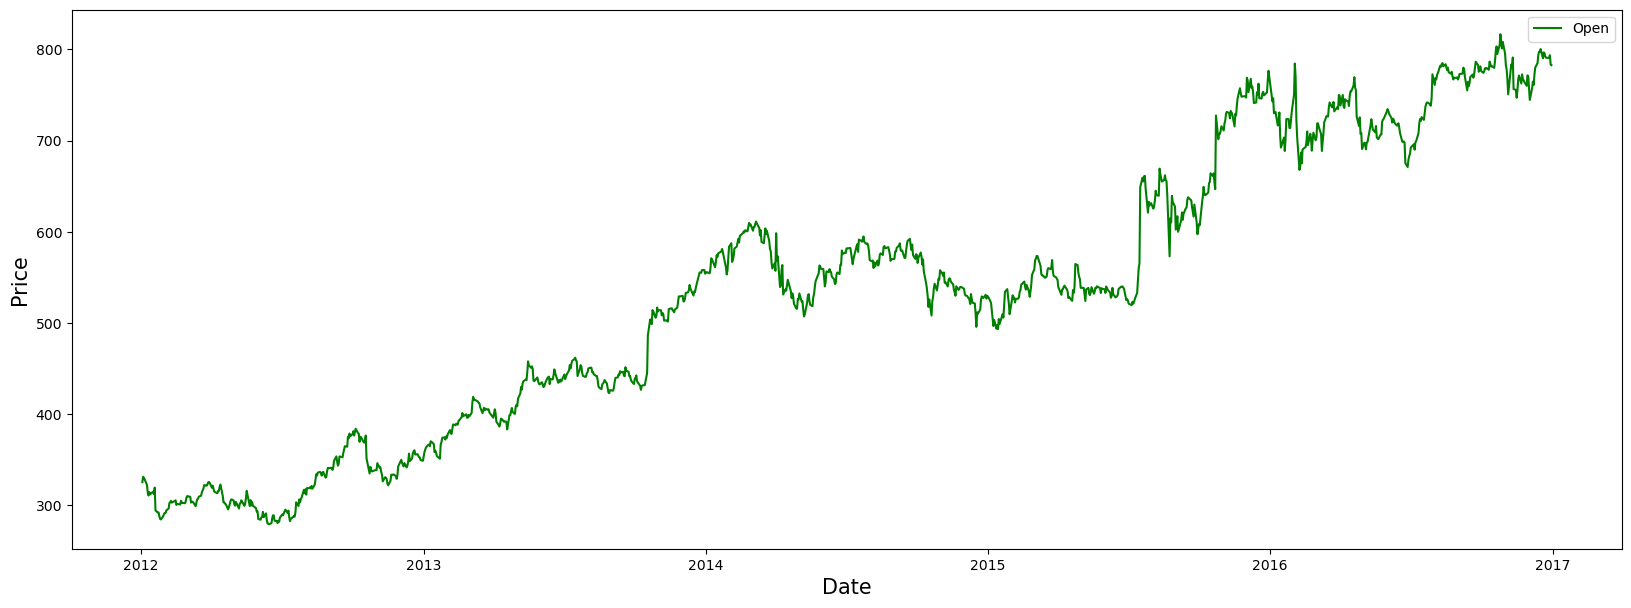

In [4]:
#Plotting the graph

plt.figure(figsize =(20,7))
plt.plot(gstock_data['Open'], label='Open',color='green')
plt.xlabel('Date',size=15)
plt.ylabel('Price',size=15)
plt.legend()

plt.show()

In [5]:
gstock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [6]:
gstock_data.shape

(1258, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
scaled_training_set = scaler.fit_transform(gstock_data)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train.shape, y_train.shape

((1198, 60), (1198,))

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [11]:
#Fitting the model 

model.fit(X_train,y_train, epochs=50, batch_size = 20)

Epoch 1/50
60/60 [==============================] - 13s 96ms/step - loss: 0.0208
Epoch 2/50
60/60 [==============================] - 6s 97ms/step - loss: 0.0066
Epoch 3/50
60/60 [==============================] - 6s 98ms/step - loss: 0.0062
Epoch 4/50
60/60 [==============================] - 6s 98ms/step - loss: 0.0058
Epoch 5/50
60/60 [==============================] - 6s 99ms/step - loss: 0.0053
Epoch 6/50
60/60 [==============================] - 6s 98ms/step - loss: 0.0045
Epoch 7/50
60/60 [==============================] - 6s 97ms/step - loss: 0.0045
Epoch 8/50
60/60 [==============================] - 6s 98ms/step - loss: 0.0040
Epoch 9/50
60/60 [==============================] - 6s 99ms/step - loss: 0.0042
Epoch 10/50
60/60 [==============================] - 6s 99ms/step - loss: 0.0040
Epoch 11/50
60/60 [==============================] - 6s 98ms/step - loss: 0.0036
Epoch 12/50
60/60 [==============================] - 6s 97ms/step - loss: 0.0037
Epoch 13/50
60/60 [=================

In [12]:
test_data = pd.read_csv("Google_Stock_Price_Test.csv")
actual_stock_price = test_data.iloc[:,1:2].values
actual_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [13]:
dataset_total = pd.concat((gstock_data["Open"],test_data["Open"]), axis= 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))   

In [14]:
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)
predicted_stock_prices

1/1 [==============================] - 2s 2s/step


array([[783.9134 ],
       [782.0947 ],
       [781.0825 ],
       [781.0299 ],
       [782.50366],
       [786.06256],
       [790.8012 ],
       [795.0007 ],
       [797.9366 ],
       [799.5486 ],
       [800.1092 ],
       [799.9319 ],
       [799.37305],
       [798.9694 ],
       [798.9616 ],
       [800.8141 ],
       [804.8783 ],
       [810.70496],
       [816.3243 ],
       [818.33954]], dtype=float32)

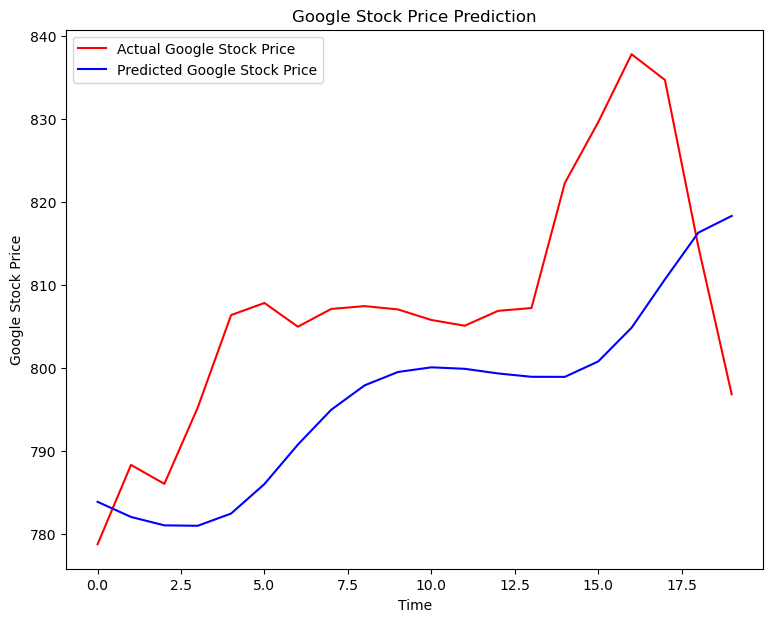

In [15]:
plt.figure(figsize = (9,7))
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_prices, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()